In [1]:
from datasets import load_dataset
dataset_LayeredDepth = load_dataset("princeton-vl/LayeredDepth")
dataset_LayeredDepth_syn_train = load_dataset("princeton-vl/LayeredDepth-Syn", split="train")
dataset_LayeredDepth_syn_val = load_dataset("princeton-vl/LayeredDepth-Syn", split="validation")

print(len(dataset_LayeredDepth_syn_train))   # ← 印出資料筆數（行數）
print(len(dataset_LayeredDepth_syn_val))   # ← 印出資料筆數（行數）
print(dataset_LayeredDepth_syn_train.column_names)
print(dataset_LayeredDepth_syn_val.column_names)

Resolving data files:   0%|          | 0/31 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/31 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/20 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/45 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

14800
500
['image.png', 'depth_1.png', 'depth_2.png', 'depth_3.png', 'depth_4.png', 'depth_5.png', 'depth_6.png', 'depth_7.png', 'depth_8.png', '__key__']
['image.png', 'depth_1.png', 'depth_2.png', 'depth_3.png', 'depth_4.png', 'depth_5.png', 'depth_6.png', 'depth_7.png', 'depth_8.png', '__key__']


In [2]:
from PIL import Image

# 假設 first_sample 是您已經獲取的 LayeredDepth-Syn 的第一個樣本
first_sample = dataset_LayeredDepth_syn_train[0]

print("--- 第一筆數據的結構、尺寸、通道數與位元深度 ---")

# 逐一檢查每個欄位 (Feature) 的類型、尺寸和通道數
for key, value in first_sample.items():
    
    # 針對圖像資料 (PIL Image) 額外印出尺寸、通道數和模式
    if isinstance(value, Image.Image):
        # 獲取圖像尺寸 (Width, Height)
        size = value.size
        # 獲取通道數 (Channels)
        channels = len(value.getbands()) 
        # 獲取圖像模式 (Mode)
        mode = value.mode
        
        # 根據模式推斷位元深度 (這是一種常用的推斷方式)
        bit_depth = "未知"
        if mode == 'RGB' or mode == 'L':
            # RGB (8-bit per channel) 或 L (8-bit grayscale)
            bit_depth = f"{8 * channels}-bit (Mode: {mode})"
        elif mode == 'I;16':
            # 16-bit 灰度或深度圖的常用模式
            bit_depth = f"16-bit (Mode: {mode})"
        elif mode == 'I':
            # 32-bit 整數
            bit_depth = f"32-bit (Mode: {mode})"
            
        
        print(f"  - {key}: {type(value)} (尺寸: {size[0]}x{size[1]}, 通道數: {channels}, 位元深度: {bit_depth})")
    
    # 針對其他非圖像資料
    elif key == '__key__':
        print(f"  - {key}: {type(value)} (值: {value})")
    
    else:
        # 處理 tuples.json 或其他欄位
        print(f"  - {key}: {type(value)}")

print("-----------------------------------")

--- 第一筆數據的結構、尺寸、通道數與位元深度 ---
  - image.png: <class 'PIL.PngImagePlugin.PngImageFile'> (尺寸: 1280x720, 通道數: 3, 位元深度: 24-bit (Mode: RGB))
  - depth_1.png: <class 'PIL.PngImagePlugin.PngImageFile'> (尺寸: 1280x720, 通道數: 1, 位元深度: 16-bit (Mode: I;16))
  - depth_2.png: <class 'PIL.PngImagePlugin.PngImageFile'> (尺寸: 1280x720, 通道數: 1, 位元深度: 16-bit (Mode: I;16))
  - depth_3.png: <class 'PIL.PngImagePlugin.PngImageFile'> (尺寸: 1280x720, 通道數: 1, 位元深度: 16-bit (Mode: I;16))
  - depth_4.png: <class 'PIL.PngImagePlugin.PngImageFile'> (尺寸: 1280x720, 通道數: 1, 位元深度: 16-bit (Mode: I;16))
  - depth_5.png: <class 'PIL.PngImagePlugin.PngImageFile'> (尺寸: 1280x720, 通道數: 1, 位元深度: 16-bit (Mode: I;16))
  - depth_6.png: <class 'PIL.PngImagePlugin.PngImageFile'> (尺寸: 1280x720, 通道數: 1, 位元深度: 16-bit (Mode: I;16))
  - depth_7.png: <class 'PIL.PngImagePlugin.PngImageFile'> (尺寸: 1280x720, 通道數: 1, 位元深度: 16-bit (Mode: I;16))
  - depth_8.png: <class 'PIL.PngImagePlugin.PngImageFile'> (尺寸: 1280x720, 通道數: 1, 位元深度: 16-bit (Mode: 

In [3]:
import torch
from dataset.LayeredDepth_Syn import LayeredDepth_Syn  # 換成你檔案的實際路徑

# 建立 dataset（先測試 train split）
dataset = LayeredDepth_Syn(mode='train', use_layers=(1,3,5,7))

# 印出資料集大小
print("✅ Dataset length:", len(dataset))

# 取出第一筆樣本
sample = dataset[0]

# 印出 key 與每個張量的形狀
for key, value in sample.items():
    if isinstance(value, torch.Tensor):
        print(f"{key}: {tuple(value.shape)}, dtype={value.dtype}")
    else:
        print(f"{key}: {type(value)}")

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/45 [00:00<?, ?it/s]

✅ Dataset length: 14800

[Sample 0]
  Layer 1: min=834.000, max=5450.000, valid=100.00%
  Layer 3: min=0.000, max=5461.000, valid=24.82%
  Layer 5: min=0.000, max=65289.000, valid=16.28%
  Layer 7: min=0.000, max=5441.000, valid=6.92%
image: (3, 518, 518), dtype=torch.float32
depth: <class 'numpy.ndarray'>
d1: (518, 518), dtype=torch.float32
d1_valid_mask: (518, 518), dtype=torch.float32
d3: (518, 518), dtype=torch.float32
d3_valid_mask: (518, 518), dtype=torch.float32
d5: (518, 518), dtype=torch.float32
d5_valid_mask: (518, 518), dtype=torch.float32
d7: (518, 518), dtype=torch.float32
d7_valid_mask: (518, 518), dtype=torch.float32


In [4]:
dataset = LayeredDepth_Syn(mode='train', use_layers=(1,3,5,7))
sample = dataset[0]

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/45 [00:00<?, ?it/s]


[Sample 0]
  Layer 1: min=756.000, max=5321.000, valid=100.00%
  Layer 3: min=0.000, max=5128.000, valid=9.92%
  Layer 5: min=0.000, max=5166.000, valid=7.40%
  Layer 7: min=0.000, max=3933.000, valid=2.68%


Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/45 [00:00<?, ?it/s]

✅ Dataset length: 14800

[Sample 0]
  Layer 1: min=1040.000, max=5450.000, valid=100.00%
  Layer 3: min=0.000, max=5461.000, valid=26.65%
  Layer 5: min=0.000, max=65289.000, valid=18.31%
  Layer 7: min=0.000, max=5441.000, valid=9.17%


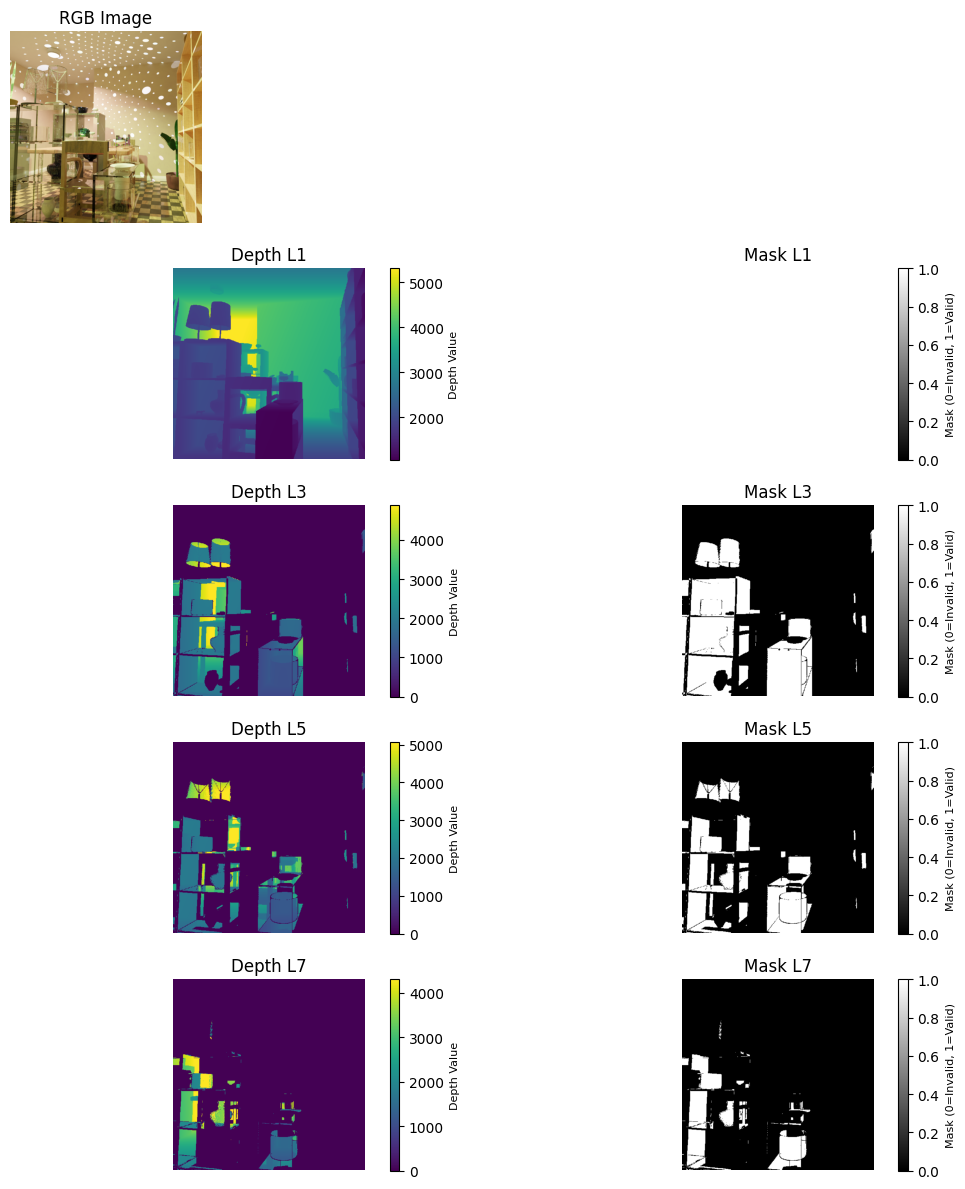

In [7]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from dataset.LayeredDepth_Syn import LayeredDepth_Syn  # 根據實際檔案調整

# 建立 dataset（train split）
dataset = LayeredDepth_Syn(mode='train', use_layers=(1,3,5,7))
print("✅ Dataset length:", len(dataset))

# 取出第一筆樣本
sample = dataset[0]

# --- 把 image 轉回 numpy 格式顯示 ---
image = sample['image'].permute(1, 2, 0).numpy()  # [H,W,3]
image = np.clip((image * np.array([0.229, 0.224, 0.225]) +
                 np.array([0.485, 0.456, 0.406])), 0, 1)  # 反標準化

layers = [1, 3, 5, 7]

# 建立畫布
fig = plt.figure(figsize=(12, 12))

# 顯示原圖
ax = plt.subplot(len(layers)+1, 2, 1)
ax.imshow(image)
ax.set_title("RGB Image")
ax.axis('off')

# 保留空白格右側
ax = plt.subplot(len(layers)+1, 2, 2)
ax.axis('off')

# 顯示每層 depth 與 mask（分開）
for i, l in enumerate(layers):
    d = sample[f'd{l}'].numpy()
    mask = sample[f'd{l}_valid_mask'].numpy()

    # === clip depth 避免過曝 ===
    d_vis = d.copy()
    d_vis[d_vis > np.percentile(d_vis, 99)] = np.percentile(d_vis, 99)
    d_vis[d_vis < np.percentile(d_vis, 1)] = np.percentile(d_vis, 1)

    # 左邊：depth
    ax1 = plt.subplot(len(layers)+1, 2, 2*i + 3)
    im1 = ax1.imshow(d_vis, cmap='viridis')
    ax1.set_title(f"Depth L{l}")
    ax1.axis('off')
    cbar1 = plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    cbar1.set_label('Depth Value', fontsize=8)

    # 右邊：mask
    ax2 = plt.subplot(len(layers)+1, 2, 2*i + 4)
    im2 = ax2.imshow(mask, cmap='gray', vmin=0, vmax=1)
    ax2.set_title(f"Mask L{l}")
    ax2.axis('off')
    cbar2 = plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    cbar2.set_label('Mask (0=Invalid, 1=Valid)', fontsize=8)

plt.tight_layout()
plt.show()